### Activity

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
from google.colab import files
uploaded = files.upload()

Saving online_retail_II2.csv to online_retail_II2.csv


In [4]:
r09 = pd.read_csv('online_retail_II2.csv')
r09.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [5]:
r10 = pd.read_csv('online_retail_II2.csv')
r10.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [6]:
dfs = [r09, r10]
retail = pd.concat(dfs, keys = ['09-10', '10-11'])
retail

Invoice StockCode  ... Customer ID         Country
09-10 0       536365    85123A  ...     17850.0  United Kingdom
      1       536365     71053  ...     17850.0  United Kingdom
      2       536365    84406B  ...     17850.0  United Kingdom
      3       536365    84029G  ...     17850.0  United Kingdom
      4       536365    84029E  ...     17850.0  United Kingdom
...              ...       ...  ...         ...             ...
10-11 541905  581587     22899  ...     12680.0          France
      541906  581587     23254  ...     12680.0          France
      541907  581587     23255  ...     12680.0          France
      541908  581587     22138  ...     12680.0          France
      541909  581587      POST  ...     12680.0          France

[1083820 rows x 8 columns]

In [7]:
retail.rename(index = str, columns = {
    'Invoice' : 'invoice', 
    'StockCode' : 'stock_code', 
    'Quantity' : 'quantity', 
    'InvoiceDate' : 'date', 
    'Price' : 'unit_price', 
    'Country' : 'country', 
    'Description' : 'desc', 
    'Customer ID' : 'cust_id'
}, inplace = True)

retail.head()

invoice stock_code  ...  cust_id         country
09-10 0  536365     85123A  ...  17850.0  United Kingdom
      1  536365      71053  ...  17850.0  United Kingdom
      2  536365     84406B  ...  17850.0  United Kingdom
      3  536365     84029G  ...  17850.0  United Kingdom
      4  536365     84029E  ...  17850.0  United Kingdom

[5 rows x 8 columns]

In [8]:
retail.isnull().sum().sort_values(ascending = False)

cust_id       270160
desc            2908
country            0
unit_price         0
date               0
quantity           0
stock_code         0
invoice            0
dtype: int64

In [9]:
retail.describe()

,quantity,unit_price,cust_id
count,1.083820e+06,1.083820e+06,813660.000000
mean,9.552234e+00,4.611138e+00,15287.684160
std,2.180809e+02,9.675972e+01,1713.602021
min,-8.099500e+04,-1.106206e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13953.000000
50%,3.000000e+00,2.080000e+00,15152.000000
75%,1.000000e+01,4.130000e+00,16791.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [10]:
retail.loc[retail['unit_price'] == 38970.0]

,,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
09-10,222681,C556445,M,Manual,-1,10/06/2011 15:31,38970.0,15098.0,United Kingdom
10-11,222681,C556445,M,Manual,-1,10/06/2011 15:31,38970.0,15098.0,United Kingdom


In [11]:
retail.loc[retail['unit_price'] == -53594.360000]

,,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country


In [12]:
(retail['unit_price'] <= 0).sum()

5034

In [13]:
(retail['quantity'] <= 0).sum()

21248

In [14]:
retail[(retail['unit_price'] <= 0) & (retail['quantity'] <= 0) & (retail['cust_id'].isnull())]

invoice stock_code     desc  ...  unit_price cust_id         country
09-10 2406    536589      21777      NaN  ...         0.0     NaN  United Kingdom
      4347    536764     84952C      NaN  ...         0.0     NaN  United Kingdom
      7188    536996      22712      NaN  ...         0.0     NaN  United Kingdom
      7189    536997      22028      NaN  ...         0.0     NaN  United Kingdom
      7190    536998      85067      NaN  ...         0.0     NaN  United Kingdom
...              ...        ...      ...  ...         ...     ...             ...
10-11 535333  581210      23395    check  ...         0.0     NaN  United Kingdom
      535335  581212      22578     lost  ...         0.0     NaN  United Kingdom
      535336  581213      22576    check  ...         0.0     NaN  United Kingdom
      536910  581226      23090  missing  ...         0.0     NaN  United Kingdom
      538925  581422      23169  smashed  ...         0.0     NaN  United Kingdom

[2672 rows x 8 columns]

In [15]:
null_retail = retail[retail.isnull().any(axis=1)]
null_retail

invoice stock_code  ... cust_id         country
09-10 622     536414      22139  ...     NaN  United Kingdom
      1443    536544      21773  ...     NaN  United Kingdom
      1444    536544      21774  ...     NaN  United Kingdom
      1445    536544      21786  ...     NaN  United Kingdom
      1446    536544      21787  ...     NaN  United Kingdom
...              ...        ...  ...     ...             ...
10-11 541536  581498     85099B  ...     NaN  United Kingdom
      541537  581498     85099C  ...     NaN  United Kingdom
      541538  581498      85150  ...     NaN  United Kingdom
      541539  581498      85174  ...     NaN  United Kingdom
      541540  581498        DOT  ...     NaN  United Kingdom

[270160 rows x 8 columns]

In [0]:
new_retail = retail[(retail['unit_price'] > 0) & (retail['quantity'] > 0)]

In [17]:
new_retail.describe()

,quantity,unit_price,cust_id
count,1.060210e+06,1.060210e+06,795770.000000
mean,1.054202e+01,3.907652e+00,15294.416882
std,1.555239e+02,3.591564e+01,1713.143345
min,1.000000e+00,1.000000e-03,12346.000000
25%,1.000000e+00,1.250000e+00,13969.000000
50%,3.000000e+00,2.080000e+00,15159.000000
75%,1.000000e+01,4.130000e+00,16795.000000
max,8.099500e+04,1.354133e+04,18287.000000


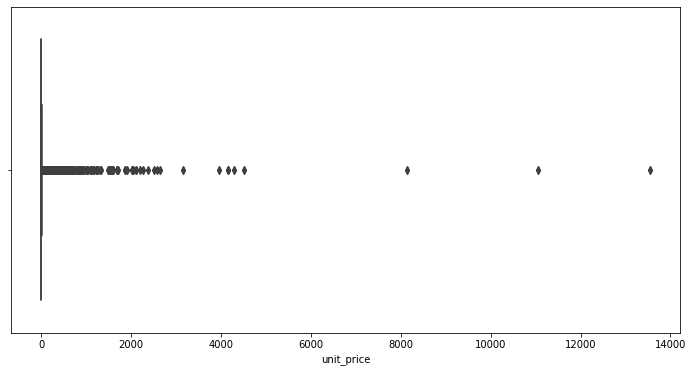

In [18]:
plt.subplots(figsize = (12, 6))
up = sns.boxplot(new_retail.unit_price)

In [19]:
new_retail = new_retail[retail.unit_price < 15000]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [20]:
new_retail.describe()

,quantity,unit_price,cust_id
count,1.060210e+06,1.060210e+06,795770.000000
mean,1.054202e+01,3.907652e+00,15294.416882
std,1.555239e+02,3.591564e+01,1713.143345
min,1.000000e+00,1.000000e-03,12346.000000
25%,1.000000e+00,1.250000e+00,13969.000000
50%,3.000000e+00,2.080000e+00,15159.000000
75%,1.000000e+01,4.130000e+00,16795.000000
max,8.099500e+04,1.354133e+04,18287.000000


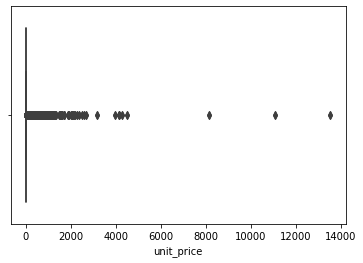

In [21]:
up_new = sns.boxplot(new_retail.unit_price)

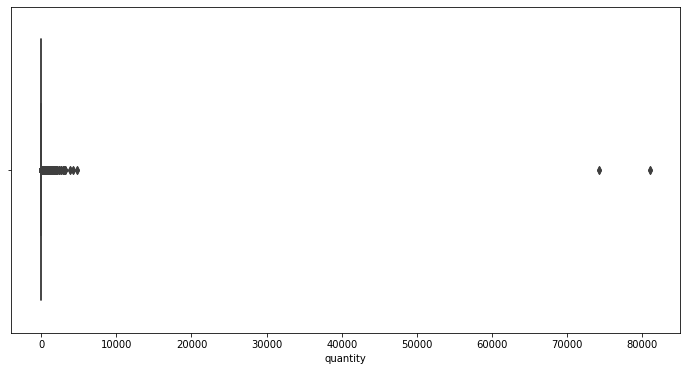

In [22]:
plt.subplots(figsize = (12, 6))
q = sns.boxplot(new_retail.quantity)

In [23]:
new_retail = new_retail[retail.quantity < 25000]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [24]:
new_retail.describe()

,quantity,unit_price,cust_id
count,1.060206e+06,1.060206e+06,795766.000000
mean,1.024927e+01,3.907661e+00,15294.421398
std,3.779350e+01,3.591570e+01,1713.140301
min,1.000000e+00,1.000000e-03,12347.000000
25%,1.000000e+00,1.250000e+00,13969.000000
50%,3.000000e+00,2.080000e+00,15159.000000
75%,1.000000e+01,4.130000e+00,16795.000000
max,4.800000e+03,1.354133e+04,18287.000000


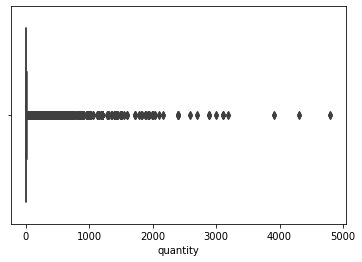

In [25]:
q_new = sns.boxplot(new_retail.quantity)

In [27]:
new_retail[(new_retail.desc.isnull()) & (new_retail.cust_id.isnull())]

,,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country


In [28]:
new_retail.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1060206 entries, (09-10, 0) to (10-11, 541909)
Data columns (total 8 columns):
invoice       1060206 non-null object
stock_code    1060206 non-null object
desc          1060206 non-null object
quantity      1060206 non-null int64
date          1060206 non-null object
unit_price    1060206 non-null float64
cust_id       795766 non-null float64
country       1060206 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 73.9+ MB


In [29]:
new_retail = new_retail.dropna()
new_retail.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 795766 entries, (09-10, 0) to (10-11, 541909)
Data columns (total 8 columns):
invoice       795766 non-null object
stock_code    795766 non-null object
desc          795766 non-null object
quantity      795766 non-null int64
date          795766 non-null object
unit_price    795766 non-null float64
cust_id       795766 non-null float64
country       795766 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 56.5+ MB


In [30]:
retail = new_retail
retail.head()

invoice stock_code  ...  cust_id         country
09-10 0  536365     85123A  ...  17850.0  United Kingdom
      1  536365      71053  ...  17850.0  United Kingdom
      2  536365     84406B  ...  17850.0  United Kingdom
      3  536365     84029G  ...  17850.0  United Kingdom
      4  536365     84029E  ...  17850.0  United Kingdom

[5 rows x 8 columns]

In [31]:
retail.desc = retail.desc.str.lower()
retail.head()

invoice stock_code  ...  cust_id         country
09-10 0  536365     85123A  ...  17850.0  United Kingdom
      1  536365      71053  ...  17850.0  United Kingdom
      2  536365     84406B  ...  17850.0  United Kingdom
      3  536365     84029G  ...  17850.0  United Kingdom
      4  536365     84029E  ...  17850.0  United Kingdom

[5 rows x 8 columns]

In [32]:
retail['date'] = pd.to_datetime(retail.date, format = '%d/%m/%Y %H:%M')
retail.head()

invoice stock_code  ...  cust_id         country
09-10 0  536365     85123A  ...  17850.0  United Kingdom
      1  536365      71053  ...  17850.0  United Kingdom
      2  536365     84406B  ...  17850.0  United Kingdom
      3  536365     84029G  ...  17850.0  United Kingdom
      4  536365     84029E  ...  17850.0  United Kingdom

[5 rows x 8 columns]

In [33]:
retail.insert(loc = 4, column = 'year_month', value = retail.date.map(lambda x: 100 * x.year + x.month))
retail.insert(loc = 5, column = 'year', value = retail.date.dt.year)
retail.insert(loc = 6, column = 'month', value = retail.date.dt.month)
retail.insert(loc = 7, column = 'day', value = retail.date.dt.day)
retail.insert(loc = 8, column ='hour', value = retail.date.dt.hour)
retail.insert(loc = 9, column='day_of_week', value=(retail.date.dt.dayofweek)+1)
retail.head()

invoice stock_code  ...  cust_id         country
09-10 0  536365     85123A  ...  17850.0  United Kingdom
      1  536365      71053  ...  17850.0  United Kingdom
      2  536365     84406B  ...  17850.0  United Kingdom
      3  536365     84029G  ...  17850.0  United Kingdom
      4  536365     84029E  ...  17850.0  United Kingdom

[5 rows x 14 columns]

In [34]:
retail.insert(loc = 11, column = 'spent', value = (retail['quantity'] * retail['unit_price']))
retail.head()

invoice stock_code  ...  cust_id         country
09-10 0  536365     85123A  ...  17850.0  United Kingdom
      1  536365      71053  ...  17850.0  United Kingdom
      2  536365     84406B  ...  17850.0  United Kingdom
      3  536365     84029G  ...  17850.0  United Kingdom
      4  536365     84029E  ...  17850.0  United Kingdom

[5 rows x 15 columns]

In [35]:
retail = retail[['invoice', 'country', 'cust_id', 'stock_code', 'desc','quantity', 'unit_price', 'date', 'spent', 
                 'year_month', 'year', 'month', 'day', 'day_of_week', 'hour']]
retail.head()

invoice         country  cust_id  ... day day_of_week  hour
09-10 0  536365  United Kingdom  17850.0  ...   1           3     8
      1  536365  United Kingdom  17850.0  ...   1           3     8
      2  536365  United Kingdom  17850.0  ...   1           3     8
      3  536365  United Kingdom  17850.0  ...   1           3     8
      4  536365  United Kingdom  17850.0  ...   1           3     8

[5 rows x 15 columns]

In [36]:
#orders made by each customer

ord_cust = retail.groupby(by = ['cust_id', 'country'], as_index = False)['invoice'].count()
ord_cust.head(10)

,cust_id,country,invoice
0,12347.0,Iceland,364
1,12348.0,Finland,62
2,12349.0,Italy,146
3,12350.0,Norway,34
4,12352.0,Norway,170
5,12353.0,Bahrain,8
6,12354.0,Spain,116
7,12355.0,Bahrain,26
8,12356.0,Portugal,118
9,12357.0,Switzerland,262


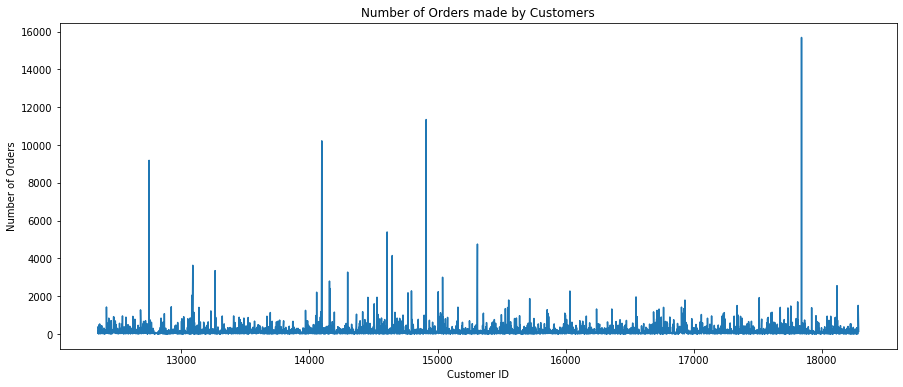

In [37]:
plt.subplots(figsize = (15, 6))
oc = plt.plot(ord_cust.cust_id, ord_cust.invoice)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders made by Customers')
plt.show()

In [38]:
ord_cust.describe()

,cust_id,invoice
count,4345.000000,4345.000000
mean,15295.788032,183.145224
std,1724.261438,457.222253
min,12347.000000,2.000000
25%,13808.000000,34.000000
50%,15296.000000,82.000000
75%,16777.000000,200.000000
max,18287.000000,15694.000000


In [39]:
# 5 customers who ordered the most number of times
ord_cust.sort_values(by = 'invoice', ascending = False).head()

,cust_id,country,invoice
4017,17841.0,United Kingdom,15694
1886,14911.0,EIRE,11350
1296,14096.0,United Kingdom,10222
333,12748.0,United Kingdom,9190
1668,14606.0,United Kingdom,5400


In [41]:
# money spent 
spent_cust = retail.groupby(by = ['cust_id', 'country'], as_index = False)['spent'].sum()
spent_cust.head()

,cust_id,country,spent
0,12347.0,Iceland,8620.00
1,12348.0,Finland,3594.48
2,12349.0,Italy,3515.10
3,12350.0,Norway,668.80
4,12352.0,Norway,5012.08


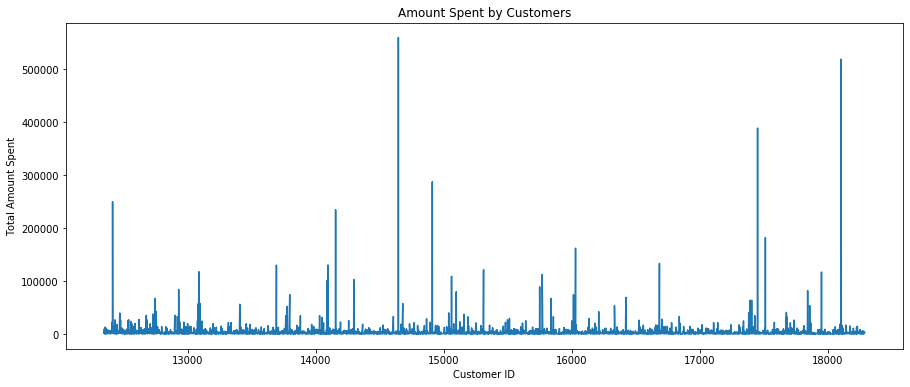

In [42]:
plt.subplots(figsize = (15, 6))
sc = plt.plot(spent_cust.cust_id, spent_cust.spent)
plt.xlabel('Customer ID')
plt.ylabel('Total Amount Spent')
plt.title('Amount Spent by Customers')
plt.show()

In [43]:
spent_cust.sort_values(by = 'spent', ascending = False).head()

,cust_id,country,spent
1696,14646.0,Netherlands,560412.04
4208,18102.0,United Kingdom,519314.60
3735,17450.0,United Kingdom,389101.58
1886,14911.0,EIRE,287650.12
56,12415.0,Australia,249829.06


In [44]:
retail.tail()

invoice country  cust_id stock_code  ... month  day  day_of_week hour
10-11 541905  581587  France  12680.0      22899  ...    12    9            5   12
      541906  581587  France  12680.0      23254  ...    12    9            5   12
      541907  581587  France  12680.0      23255  ...    12    9            5   12
      541908  581587  France  12680.0      22138  ...    12    9            5   12
      541909  581587  France  12680.0       POST  ...    12    9            5   12

[5 rows x 15 columns]

In [45]:
retail.head()

invoice         country  cust_id  ... day day_of_week  hour
09-10 0  536365  United Kingdom  17850.0  ...   1           3     8
      1  536365  United Kingdom  17850.0  ...   1           3     8
      2  536365  United Kingdom  17850.0  ...   1           3     8
      3  536365  United Kingdom  17850.0  ...   1           3     8
      4  536365  United Kingdom  17850.0  ...   1           3     8

[5 rows x 15 columns]

In [46]:
#orders per month 

ord_month = retail.groupby(['invoice'])['year_month'].unique().value_counts().sort_index()
ord_month

[201012]    1400
[201101]     986
[201102]     997
[201103]    1321
[201104]    1149
[201105]    1555
[201106]    1393
[201107]    1331
[201108]    1280
[201109]    1755
[201110]    1929
[201111]    2657
[201112]     777
Name: year_month, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

`Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.



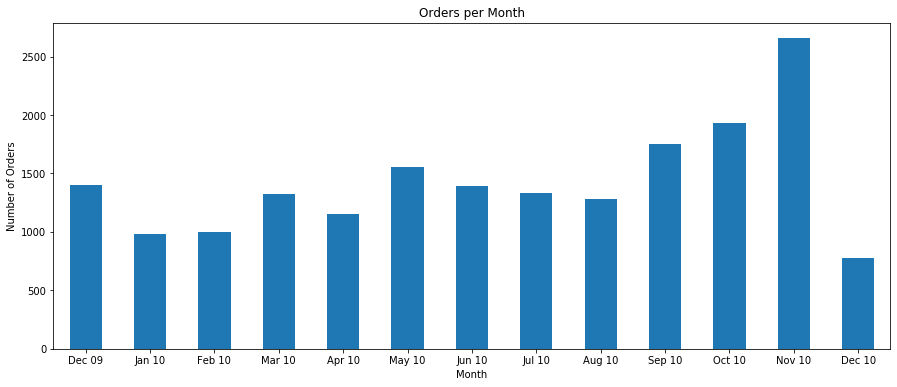

In [47]:
om = ord_month.plot('bar', figsize = (15, 6))
om.set_xlabel('Month')
om.set_ylabel('Number of Orders')
om.set_title('Orders per Month')
om.set_xticklabels(('Dec 09', 'Jan 10', 'Feb 10', 'Mar 10', 'Apr 10', 'May 10', 
                           'Jun 10', 'Jul 10', 'Aug 10', 'Sep 10', 'Oct 10', 'Nov 10', 'Dec 10',
                   'Jan 11', 'Feb 11', 'Mar 11', 'Apr 11', 'May 11', 
                           'Jun 11', 'Jul 11', 'Aug 11', 'Sep 11', 'Oct 11', 'Nov 11', 'Dec 11'), rotation = 'horizontal')
plt.show()                          

In [48]:
# most popular time of the month to order

ord_day = retail.groupby('invoice')['day'].unique().value_counts().sort_index()
ord_day

[1]     709
[2]     613
[3]     520
[4]     629
[5]     723
[6]     801
[7]     773
[8]     771
[9]     659
[10]    626
[11]    629
[12]    507
[13]    596
[14]    670
[15]    553
[16]    650
[17]    694
[18]    571
[19]    519
[20]    661
[21]    594
[22]    564
[23]    579
[24]    583
[25]    561
[26]    446
[27]    545
[28]    624
[29]    404
[30]    443
[31]    313
Name: day, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

`Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.



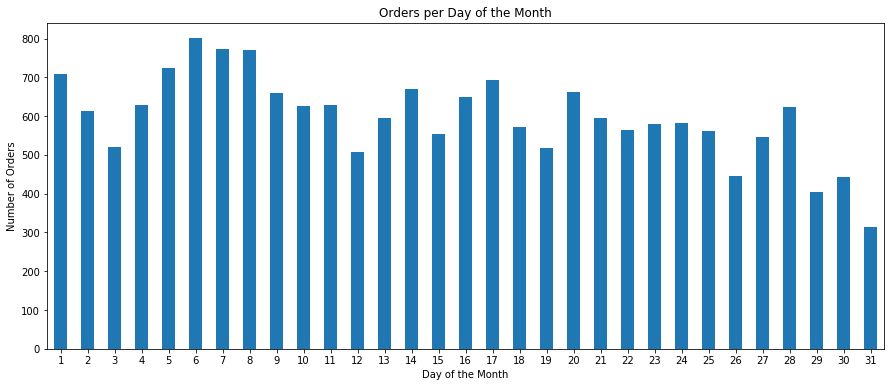

In [49]:
od = ord_day.plot('bar', figsize = (15, 6))
od.set_xlabel('Day of the Month')
od.set_ylabel('Number of Orders')
od.set_title('Orders per Day of the Month')
od.set_xticklabels(labels = [i for i in range (1, 32)], rotation = 'horizontal')
plt.show()                          

In [50]:
# orders per day of the week

ord_dayofweek = retail.groupby('invoice')['day_of_week'].unique().value_counts().sort_index()
ord_dayofweek

[1]    2863
[2]    3183
[3]    3455
[4]    4032
[5]    2828
[7]    2169
Name: day_of_week, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

`Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.



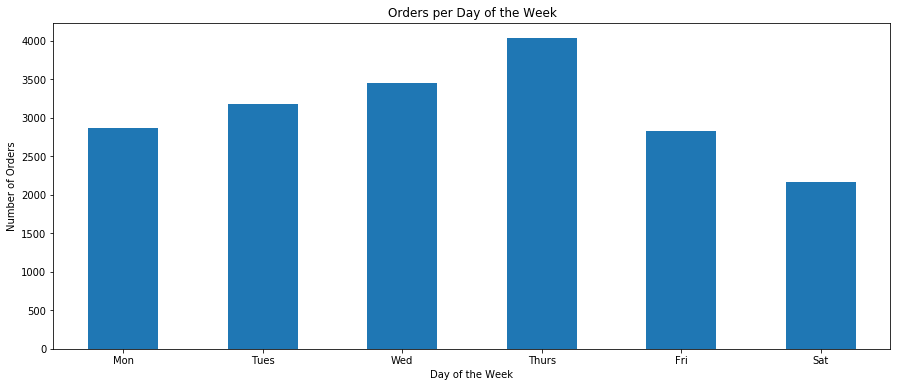

In [52]:
odw = ord_dayofweek.plot('bar', figsize = (15, 6))
odw.set_xlabel('Day of the Week')
odw.set_ylabel('Number of Orders')
odw.set_title('Orders per Day of the Week')
odw.set_xticklabels(labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], rotation = 'horizontal')
plt.show()                          

In [53]:
q_item = retail.groupby(by = ['desc'], as_index = False)['quantity'].sum()
q_item.head()

,desc,quantity
0,4 purple flock dinner candles,280
1,50's christmas gift bag large,3770
2,dolly girl beaker,4796
3,i love london mini backpack,720
4,i love london mini rucksack,2


In [54]:
q_item.sort_values(by = 'quantity', ascending = False).head()

,desc,quantity
3785,world war 2 gliders asstd designs,108830
1762,jumbo bag red retrospot,92362
3697,white hanging heart t-light holder,73450
216,assorted colour bird ornament,70724
2269,pack of 72 retrospot cake cases,67386


In [55]:
item_month = retail.groupby(by = ['desc', 'year_month'], as_index = False)['quantity'].sum()
item_month.sort_values(by = 'quantity', ascending = False).head()

,desc,year_month,quantity
20769,rabbit night light,201111,24786
30013,world war 2 gliders asstd designs,201104,20448
20394,popcorn holder,201111,16916
30019,world war 2 gliders asstd designs,201110,16348
26062,small popcorn holder,201105,13476


In [57]:
item_dayofweek = retail.groupby(by = ['desc', 'day_of_week'], as_index = False)['quantity'].sum()
item_dayofweek.sort_values(by = 'quantity', ascending = False).head()

,desc,day_of_week,quantity
19388,world war 2 gliders asstd designs,4,36214
8944,jumbo bag red retrospot,4,22496
1109,assorted colour bird ornament,4,22352
19387,world war 2 gliders asstd designs,3,20292
8943,jumbo bag red retrospot,3,19486


In [58]:
item_coun = retail.groupby(by = ['desc', 'country'], as_index = False)['quantity'].sum()
item_coun.sort_values(by = 'quantity', ascending = False).head()

,desc,country,quantity
18899,world war 2 gliders asstd designs,United Kingdom,98364
8272,jumbo bag red retrospot,United Kingdom,83962
18402,white hanging heart t-light holder,United Kingdom,69296
1100,assorted colour bird ornament,United Kingdom,65454
12341,popcorn holder,United Kingdom,57870


In [59]:
retail_sort = retail.sort_values(['cust_id', 'stock_code', 'date'])
retail_sort_shift1 = retail_sort.shift(1)
retail_sort_reorder = retail_sort.copy()

retail_sort_reorder['reorder'] = np.where(retail_sort['stock_code'] == retail_sort_shift1['stock_code'], 1, 0)
retail_sort_reorder.head()

,,invoice,country,cust_id,stock_code,desc,quantity,unit_price,date,spent,year_month,year,month,day,day_of_week,hour,reorder
09-10,148306,549222,Iceland,12347.0,16008,small folding scissor(pointed edge),24,0.25,2011-04-07 10:43:00,6.0,201104,2011,4,7,4,10,0
10-11,148306,549222,Iceland,12347.0,16008,small folding scissor(pointed edge),24,0.25,2011-04-07 10:43:00,6.0,201104,2011,4,7,4,10,1
09-10,220583,556201,Iceland,12347.0,17021,namaste swagat incense,36,0.30,2011-06-09 13:01:00,10.8,201106,2011,6,9,4,13,0
10-11,220583,556201,Iceland,12347.0,17021,namaste swagat incense,36,0.30,2011-06-09 13:01:00,10.8,201106,2011,6,9,4,13,1
09-10,148289,549222,Iceland,12347.0,20665,red retrospot purse,6,2.95,2011-04-07 10:43:00,17.7,201104,2011,4,7,4,10,0


In [60]:
rsr = pd.DataFrame((retail_sort_reorder.groupby('desc')['reorder'].sum())).sort_values('reorder', ascending = False)
rsr.head()

,reorder
desc,
white hanging heart t-light holder,3200
jumbo bag red retrospot,2601
regency cakestand 3 tier,2565
assorted colour bird ornament,2138
lunch bag red retrospot,2101


In [61]:
q_up = retail.groupby(by = ['unit_price'], as_index = False)['quantity'].sum()
q_up.sort_values('quantity', ascending = False).head(10)

,unit_price,quantity
73,1.25,986472
30,0.42,943694
88,1.65,747350
52,0.85,600742
78,1.45,473574
134,2.55,339064
43,0.72,316876
28,0.39,306320
64,1.06,299190
113,2.10,286902


In [62]:
up_arr = np.array(retail.unit_price)
q_arr = np.array(retail.quantity)

np.corrcoef(up_arr, q_arr)

array([[ 1.        , -0.01844801],
       [-0.01844801,  1.        ]])

In [63]:
ord_coun = retail.groupby(['country'])['invoice'].count().sort_values()
ord_coun.head()

country
Saudi Arabia      18
Bahrain           34
Czech Republic    50
Brazil            64
Lithuania         70
Name: invoice, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

`Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.



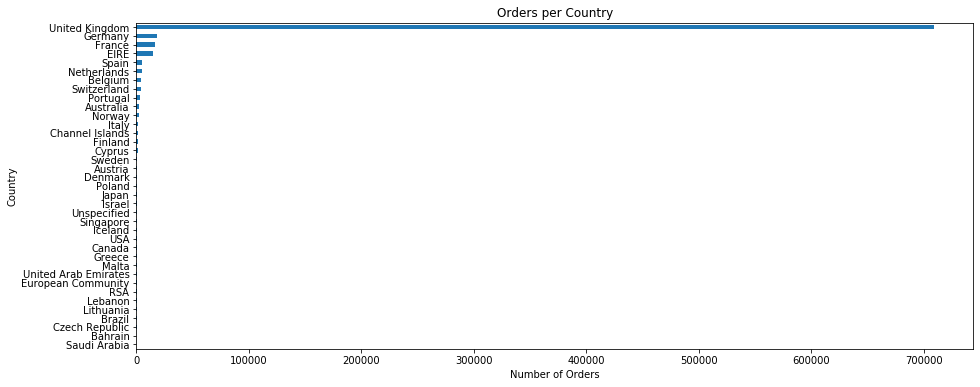

In [64]:
ocoun = ord_coun.plot('barh', figsize = (15, 6))
ocoun.set_xlabel('Number of Orders')
ocoun.set_ylabel('Country')
ocoun.set_title('Orders per Country')
plt.show()     

In [0]:
del ord_coun['United Kingdom']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

`Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.



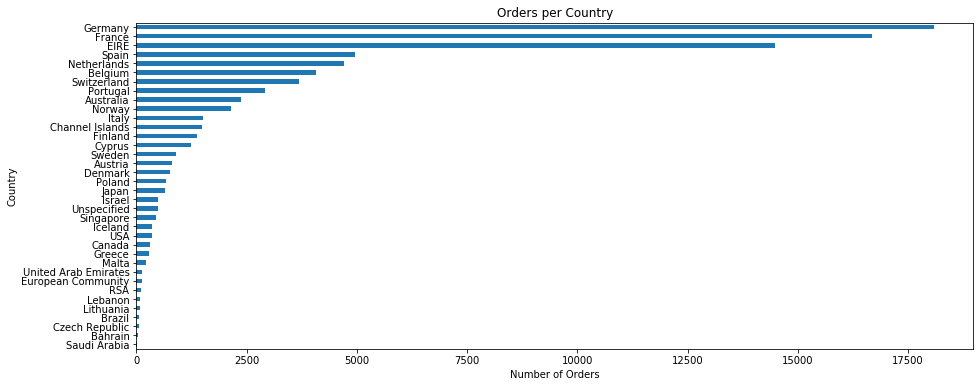

In [66]:
ocoun2 = ord_coun.plot('barh', figsize = (15, 6))
ocoun2.set_xlabel('Number of Orders')
ocoun2.set_ylabel('Country')
ocoun2.set_title('Orders per Country')
plt.show() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

`Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.



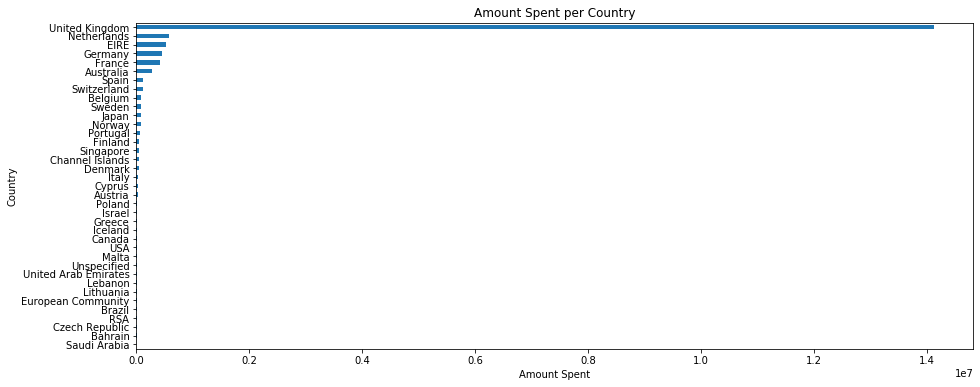

In [67]:
coun_spent = retail.groupby('country')['spent'].sum().sort_values()

cs = coun_spent.plot('barh', figsize = (15, 6))
cs.set_xlabel('Amount Spent')
cs.set_ylabel('Country')
cs.set_title('Amount Spent per Country')
plt.show() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

`Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.



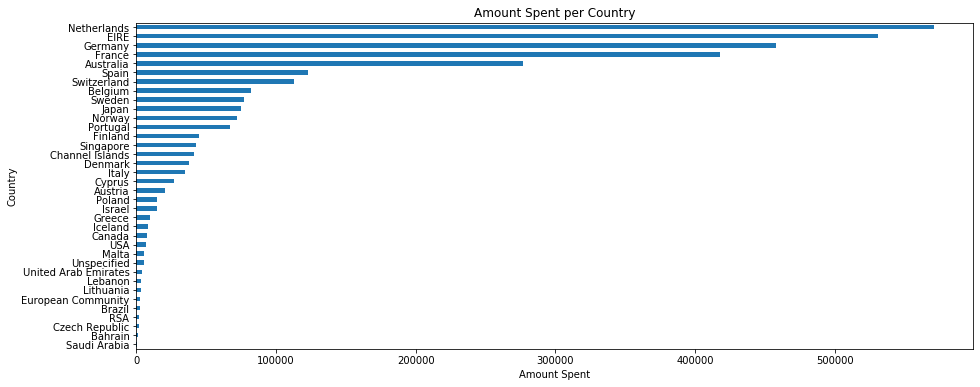

In [68]:
del coun_spent['United Kingdom']

cs2 = coun_spent.plot('barh', figsize = (15, 6))
cs2.set_xlabel('Amount Spent')
cs2.set_ylabel('Country')
cs2.set_title('Amount Spent per Country')
plt.show() 